In [2]:
import nltk
from nltk.stem.snowball import GermanStemmer

In [3]:
# http://compling.hss.ntu.edu.sg/omw/
# https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/
# from nltk.corpus import germanet as gn
# pip install german-lemmatizer

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv("training.txt", skiprows=1,\
                      names=['tweet-id', 'latitude','longitude', 'tweet'])
dataset = dataset.set_index('tweet-id', drop=True)

In [27]:
dataset.head()

latitude  longitude  \
tweet-id                         
100377    51.918188  10.599245   
109550    52.711074   9.987374   
111440    52.386711  11.700612   
116670    52.314631   9.701835   
100908    52.711074   9.987374   

                                                      tweet  
tweet-id                                                     
100377    Haha bin au w isch der amig au so richtig lang...  
109550    isch d hiltl dachterrasse amne samstig viel bs...  
111440    Ich fühle mich wie die Weimarer Republik... .....  
116670    Eui liebschte Lunchidee zum Mitneh? 😬 En Grill...  
100908    Mini längscht Beziehig hani über de Quizduell ...

In [28]:
bounding_box = ((dataset["longitude"].min(), dataset["longitude"].max(), 
                 dataset["latitude"].min(), dataset["latitude"].max()))
bounding_box

(7.030000000000001, 12.7, 48.16999999999999, 53.53999999999999)

In [29]:
mass_center = np.array([(bounding_box[0] + bounding_box[1]) / 2,\
                        (bounding_box[2] + bounding_box[3]) / 2])

https://www.openstreetmap.org/export#map=5/51.500/-0.100

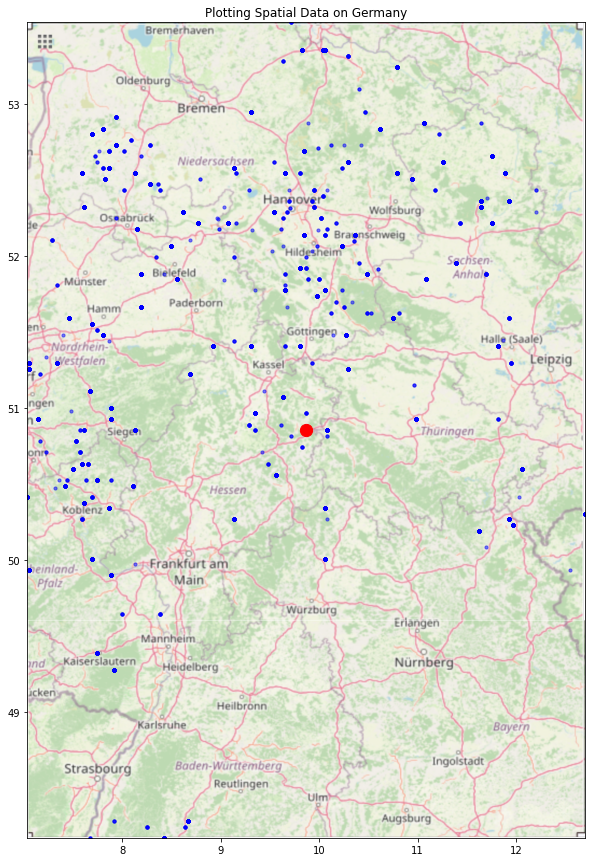

In [54]:
germany = plt.imread('bounding_box.png')
fig, ax = plt.subplots(figsize = (10, 15))

ax.scatter(dataset["longitude"], dataset["latitude"], \
           zorder=1, alpha=0.5, c='b', s = 10)
ax.scatter(mass_center[0], mass_center[1], zorder=3, alpha=1, c='r', s = 150)

ax.set_title('Plotting Spatial Data on Germany')

ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(germany, zorder=0, extent = bounding_box, aspect= 'auto')